In [85]:
import csv
import re
import matplotlib
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style, colors
import matplotlib.patches as patches
from matplotlib import gridspec


matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)


In [86]:
# f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutations_for_oncoprint_124_patients.txt'
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/124_patients/124_patients_integration_details_merged_comparison_oncoprint.txt'
df = pd.read_csv(f1, index_col='percentage')
df.head(3)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Positive,Negative,...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive
Puatative_Histology,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Squamous,Squamous,Adeno,...,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adeno,Squamous,Squamous,Adeno
HPV_16(43%),integrated,NaN,integrated,NaN,NaN,unintegrated,integrated,integrated,NaN,NaN,...,integrated,NaN,integrated,NaN,NaN,integrated,NaN,NaN,NaN,NaN


In [87]:
clrs = ['white', "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C"]#,"#F0E442"]#,'black',"#D55E00","#CC79A7"]

In [88]:
df = df.sort_values(df.index.tolist(), axis=1, ascending=False).fillna('not_detected')
df.head()

,HTMCP-03-06-02103,HTMCP-03-06-02144,HTMCP-03-06-02217,HTMCP-03-06-02239,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02003,HTMCP-03-06-02071,HTMCP-03-06-02108,HTMCP-03-06-02109,...,HTMCP-03-06-02047,HTMCP-03-06-02075,HTMCP-03-06-02150,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02061
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,not_detected
Puatative_Histology,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,...,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,not_detected
HPV_16(43%),unintegrated,unintegrated,unintegrated,unintegrated,integrated,integrated,integrated,integrated,integrated,integrated,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,unintegrated
HPV_18(31%),integrated,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,...,integrated,integrated,integrated,integrated,integrated,not_detected,not_detected,not_detected,not_detected,not_detected
HPV_45(20%),not_detected,not_detected,not_detected,not_detected,unintegrated,not_detected,not_detected,not_detected,not_detected,not_detected,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [89]:
df.replace('not_detected', 0, inplace=True)

In [90]:
assert len(pd.Series(df.values.ravel()).unique()) == len(clrs)

In [91]:
pd.Series(df.values.ravel()).unique()

array(['Positive', 'Negative', 0, 'Squamous', 'Adeno', 'unintegrated',
       'integrated'], dtype=object)

In [92]:
# # s = {k: d[k] for k in sorted(d, key=d.get, reverse=False)}
# map_dict1 = {0: 0.05,
#  'Adeno': 0.15,
#  'Squamous': 0.25,
#  'Negative': 0.35,
#  'Positive': 0.45,
#  'NON_SYNONYMOUS_CODING': 0.55,
#  'CODON_DELETION': 0.65,
#  'Multiple': 0.75,
#  'FRAME_SHIFT': 0.85,
#  'SPLICE_ACCEPTOR_DONOR': 0.95,
#  'STOP_GAINED': 1.05}

In [93]:
# s = {k: d[k] for k in sorted(d, key=d.get, reverse=False)}
map_dict1 = {0: 0.05,
 'Adeno': 0.15,
 'Squamous': 0.25,
 'Negative': 0.35,
 'Positive': 0.45,
 'unintegrated': 0.55,
 'integrated': 0.65,
}

In [94]:
map_dict2 = {}
for n, k in enumerate(map_dict1.keys()):
    map_dict2[k] = clrs[n]
map_dict2

{0: 'white',
 'Adeno': 'purple',
 'Squamous': '#E69F00',
 'Negative': '#009E73',
 'Positive': '#56B4E9',
 'unintegrated': '#377EB8',
 'integrated': '#E41A1C'}

In [95]:
assert list(map_dict2.values()) == clrs

In [96]:
ndf = df.apply(lambda x: x.map(map_dict1)).fillna(0)
ndf.head(4)

,HTMCP-03-06-02103,HTMCP-03-06-02144,HTMCP-03-06-02217,HTMCP-03-06-02239,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02003,HTMCP-03-06-02071,HTMCP-03-06-02108,HTMCP-03-06-02109,...,HTMCP-03-06-02047,HTMCP-03-06-02075,HTMCP-03-06-02150,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02061
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,...,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.05
Puatative_Histology,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.05
HPV_16(43%),0.55,0.55,0.55,0.55,0.65,0.65,0.65,0.65,0.65,0.65,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55
HPV_18(31%),0.65,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.65,0.65,0.65,0.65,0.65,0.05,0.05,0.05,0.05,0.05


In [97]:
odf = df.apply(lambda x: x.map(map_dict2))
odf.head()

,HTMCP-03-06-02103,HTMCP-03-06-02144,HTMCP-03-06-02217,HTMCP-03-06-02239,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02003,HTMCP-03-06-02071,HTMCP-03-06-02108,HTMCP-03-06-02109,...,HTMCP-03-06-02047,HTMCP-03-06-02075,HTMCP-03-06-02150,HTMCP-03-06-02182,HTMCP-03-06-02203,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02061
percentage,,,,,,,,,,,,,,,,,,,,,
HIV_Status,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,#56B4E9,...,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,#009E73,white
Puatative_Histology,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,#E69F00,...,purple,purple,purple,purple,purple,purple,purple,purple,purple,white
HPV_16(43%),#377EB8,#377EB8,#377EB8,#377EB8,#E41A1C,#E41A1C,#E41A1C,#E41A1C,#E41A1C,#E41A1C,...,white,white,white,white,white,white,white,white,white,#377EB8
HPV_18(31%),#E41A1C,white,white,white,white,white,white,white,white,white,...,#E41A1C,#E41A1C,#E41A1C,#E41A1C,#E41A1C,white,white,white,white,white
HPV_45(20%),white,white,white,white,#377EB8,white,white,white,white,white,...,white,white,white,white,white,white,white,white,white,white


In [98]:
# get gene list
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/genes.txt'
df2 = pd.read_csv(f2)
df2.head(2)
genes = df2.genes.tolist()

In [99]:
legends = sorted(map_dict1, key=map_dict1.get, reverse=False)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


CPU times: user 7.98 s, sys: 233 ms, total: 8.21 s
Wall time: 8.21 s


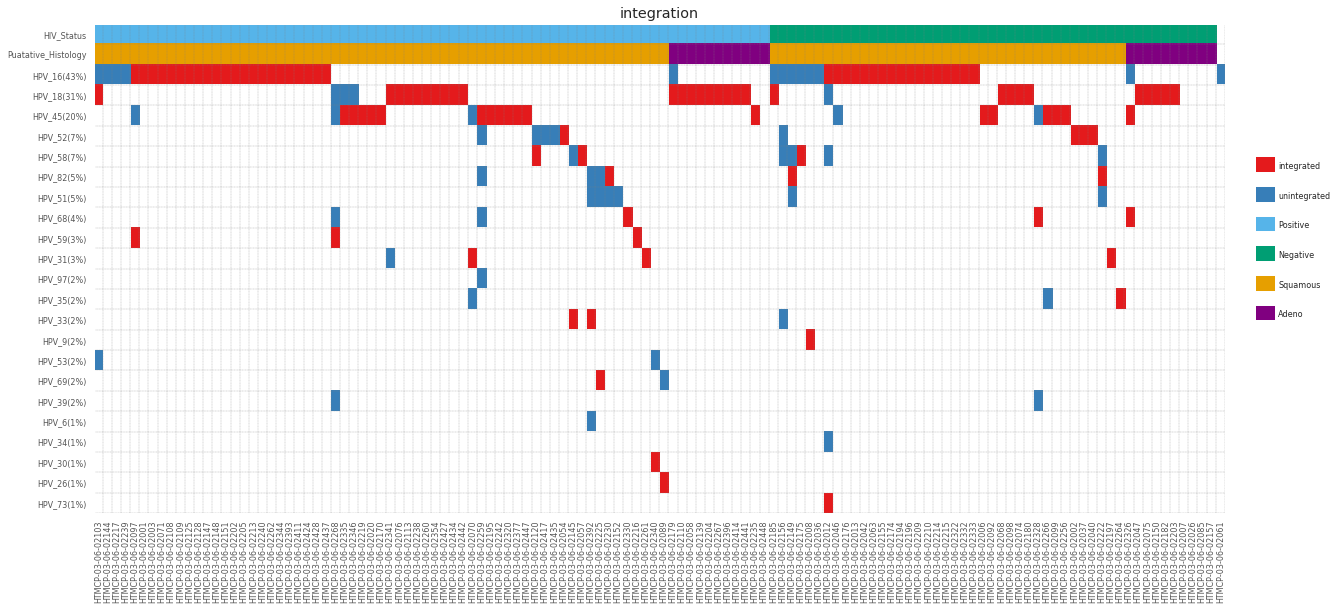

In [102]:
df = ndf.copy()
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig = plt.figure(figsize=(22, 9))
fig = plt.figure(figsize=(22, 9), facecolor='white')

gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[17,1], 
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

# clrs = ['white', "purple", "#E69F00","#009E73","#56B4E9","#377EB8","#E41A1C","#F0E442",'black',"#D55E00","#CC79A7"]
# clrs = ['white',  'orange', 'purple','green',  'navy', 'red','blue', 'magenta' ]#"#0072B2",

bounds = np.arange(0, len(map_dict1)/10.0 + 0.1 , 0.1).tolist()
assert len(bounds) == len(map_dict1) + 1
# make a color map of fixed colors
cmap = colors.ListedColormap(clrs)
norm = colors.BoundaryNorm(bounds, cmap.N)
nrow = len(df.index)
ncol = len(df.columns)

ax1 = fig.add_subplot(gs[0])
img = ax1.imshow(df.values, interpolation='none', origin='upper', aspect='auto',
                    cmap=cmap, norm=norm)

_ = plt.yticks(np.arange(0, nrow, 1), df.index, fontsize=8)
_ = plt.xticks(np.arange(0, ncol, 1), df.columns, fontsize=8, rotation=90)

_ = ax1.set_yticks(np.arange(-.5, nrow, 1), minor=True);
_ = ax1.set_xticks(np.arange(-.5, ncol, 1), minor=True);

# Gridlines based on minor ticks
_ = ax1.grid(b=True, which='minor', color='gray', linestyle='--', linewidth=0.3)
# hide major tick grid
_ = ax1.grid(b=True, which='major', color='r', linestyle='-', linewidth=0)

ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)
ax1.set_title('integration')

# add legend
gs01 = gridspec.GridSpecFromSubplotSpec(2, 1,  height_ratios=[2, 1], subplot_spec=gs[1])
ax2_1 = fig.add_subplot(gs01[0], facecolor='white')
ax2_1.set_title("mutations")


# plot mutation legend
k = -1
for key in map_dict2:
    if key !=0: # don't plot key=0 which means no mutation
        clr = map_dict2[key]
        rect = patches.Rectangle((0,k/10), 0.3, 0.05, linewidth=0.01,edgecolor=clr,facecolor=clr)
        _ = ax2_1.text(0.35, k/10+.02, key, ha='left', va='center', fontsize=8)
        _ = ax2_1.add_patch(rect)
    k+=1
ax2_1.get_xaxis().set_ticks([])
ax2_1.get_yaxis().set_ticks([])

ax2_1.set_title('')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/124_patients/integration_oncoprint_124_patients.png'
%time plt.savefig(of, bbox_inches='tight',dpi=300)
plt.show()
plt.close()